In [1]:
#Import Library
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

# Program being used to plot data
style.use("ggplot")

# dataset used
data = pd.read_csv("student_mat_2173a47420.csv", sep=";")

# what is being predicted
predict = "G3"

# The values being used
data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
data = shuffle(data)

# Seperating the data and features
x = np.array(data.drop(columns=[predict]))
y =np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [2]:
# train model best time
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

# Saves the results when accuracy is greater then the set best (0)
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy: 0.7896291556183311
Accuracy: 0.8612950492750461
Accuracy: 0.8280252799295367
Accuracy: 0.8190901098918039
Accuracy: 0.8210898912184023
Accuracy: 0.7370296304282034
Accuracy: 0.8519791861141354
Accuracy: 0.7936754307353583
Accuracy: 0.7469392773063745
Accuracy: 0.8391223176604626
Accuracy: 0.686494331527094
Accuracy: 0.8883186746413071
Accuracy: 0.7187446801493358
Accuracy: 0.6916918674357231
Accuracy: 0.8906386957584522
Accuracy: 0.8021979527886853
Accuracy: 0.899234333764424
Accuracy: 0.8042433641133526
Accuracy: 0.87160345144659
Accuracy: 0.8042979343955048


In [3]:
# Load model
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

# Print Coefficients and Intercept in easy to view way
print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

# Predicts all the points on Y and X axis
predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])

-------------------------
Coefficient: 
 [ 0.1721004   0.97068333  0.03555329 -0.19869472 -0.20422903]
Intercept: 
 -1.5871333242741699
-------------------------
8.289462242623593 [9 9 0 0 2] 10
15.682888596835419 [16 15 16  0  3] 15
10.827195653755707 [13 11  3  1  2] 11
-0.5320050272245742 [12  0  0  2  3] 0
10.217711200060009 [12 10 18  1  2] 10
12.587502953484853 [11 13  2  0  2] 13
11.993149045066737 [12 12  2  0  1] 11
8.053104592193534 [10  9  0  0  4] 0
13.703824090476706 [12 14  7  0  3] 14
12.147745816302809 [14 12  8  1  2] 12
5.877399600822797 [ 7  6 18  0  1] 6
16.18795456016805 [15 16  2  0  2] 16
8.328440188633925 [10  9  2  0  3] 9
19.962747933496335 [18 19  6  0  1] 19
2.8986843590989455 [7 4 0 2 1] 0
3.6917329847420444 [6 5 0 1 2] 0
7.688936757825925 [ 9  8 16  1  2] 7
8.283158948041896 [ 9  9 11  2  2] 9
5.73764986261487 [7 7 4 0 4] 6
19.14903445424539 [17 18 21  0  2] 18
14.912048370163689 [14 15  4  0  3] 16
12.358920977349705 [10 13  6  1  2] 13
12.09414287486204 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


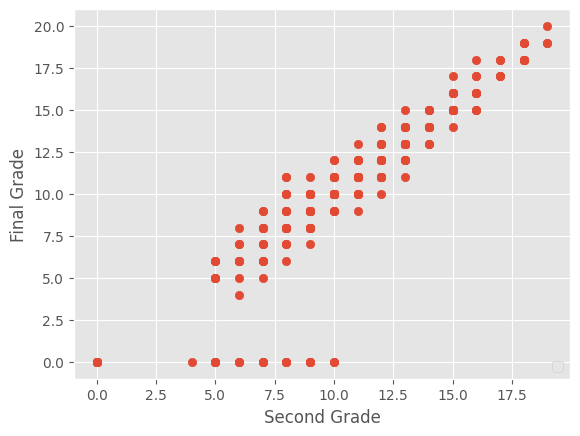

In [4]:
# Drawing and plotting model
plot = "G2"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.xlabel("Second Grade")
plt.show()